In [1]:
import pandas as pd
df = pd.read_csv('Bike2.csv', encoding='utf8', index_col=0)
df2 = df
list_dong = df2['동'].unique().tolist()
df2['동'] = df2['동'].map(lambda x: list_dong.index(x))
list_st = df2['대여소근처역'].unique().tolist()
df2['대여소근처역'] = df2['대여소근처역'].map(lambda x: list_st.index(x))
df2['대여일자'] = df2['대여일자'].astype(str)
df2['대여일자'] = df2['대여일자'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df2['대여일자'] = df2['대여일자'].astype(int)
df2.dtypes
dataset = df2.sample(n=100000)
dataset.shape

(100000, 17)

In [2]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (95000, 17)
Unseen Data For Predictions: (5000, 17)


In [3]:
data_unseen

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분),주말,요일,대여소근처역,소재지,동,산업종류,광고
0,20220604,2,1741,1,1,2,2,1,2,1,1,5,95,22,109,9,29
1,20220621,1,1910,0,0,2,1,1,1,1,0,1,184,8,81,5,29
2,20220621,1,2282,0,0,1,1,3,2,3,0,1,224,12,11,0,29
3,20220603,1,1447,0,2,3,1,2,2,2,0,4,235,14,273,4,29
4,20220617,1,1214,0,2,4,1,1,1,2,0,4,220,1,55,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20220612,2,1683,0,0,0,1,0,0,0,1,6,87,3,96,4,29
4996,20220617,1,1158,0,0,2,1,0,0,0,0,4,35,0,76,10,29
4997,20220601,0,2183,0,1,2,1,1,1,0,0,2,73,15,116,1,29
4998,20220626,2,1290,0,2,0,1,1,1,0,1,6,98,1,112,3,29


In [4]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = '광고', session_id=123)

,Description,Value
0,session_id,123
1,Target,광고
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(95000, 17)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
exp_clf101

([<pandas.io.formats.style.Styler at 0x1e159216b20>],
 'lightgbm',
 20219    29
 12071     1
 57323    29
 35234    29
 59257    29
          ..
 63206    29
 61404    29
 17730    29
 28030    28
 15725    29
 Name: 광고, Length: 66499, dtype: int64,
 StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
 '광고',
 'lightgbm',
 {'acc': <pycaret.containers.metrics.classification.AccuracyMetricContainer at 0x1e185dcb1f0>,
  'auc': <pycaret.containers.metrics.classification.ROCAUCMetricContainer at 0x1e185dcb250>,
  'recall': <pycaret.containers.metrics.classification.RecallMetricContainer at 0x1e185dcb2e0>,
  'precision': <pycaret.containers.metrics.classification.PrecisionMetricContainer at 0x1e185dcb430>,
  'f1': <pycaret.containers.metrics.classification.F1MetricContainer at 0x1e185dcb580>,
  'kappa': <pycaret.containers.metrics.classification.KappaMetricContainer at 0x1e185dcb6d0>,
  'mcc': <pycaret.containers.metrics.classification.MCCMetricContainer at 0x1e185dcb760>},
 False

In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9729,0.0000,0.8099,0.9732,0.9729,0.9314,0.9314,0.1690
nb,Naive Bayes,0.9719,0.0000,0.8713,0.9753,0.9722,0.9286,0.9287,0.2220
et,Extra Trees Classifier,0.9706,0.0000,0.6851,0.9697,0.9699,0.9252,0.9252,2.3480
rf,Random Forest Classifier,0.9693,0.0000,0.6010,0.9678,0.9680,0.9218,0.9218,1.9350
gbc,Gradient Boosting Classifier,0.9635,0.0000,0.6405,0.9653,0.9638,0.9086,0.9088,151.6360
lda,Linear Discriminant Analysis,0.8865,0.0000,0.7984,0.9542,0.9155,0.7405,0.7474,1.0010
qda,Quadratic Discriminant Analysis,0.8718,0.0000,0.5953,0.8781,0.8715,0.8287,0.8290,0.4980
lr,Logistic Regression,0.7756,0.0000,0.0375,0.6015,0.6775,0.0000,0.0000,4.2930
ridge,Ridge Classifier,0.7756,0.0000,0.0375,0.6015,0.6775,0.0000,0.0000,0.1070
ada,Ada Boost Classifier,0.7756,0.0000,0.0375,0.6015,0.6775,0.0000,0.0000,2.2670


In [11]:
pip install bentoml

     -------------------------------------- 779.6/779.6 kB 4.5 MB/s eta 0:00:00
  Using cached python_dotenv-0.20.0-py3-none-any.whl (17 kB)
  Using cached python-multipart-0.0.5.tar.gz (32 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 47.8/47.8 kB ? eta 0:00:00
     ---------------------------------------- 51.5/51.5 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 57.1/57.1 kB ? eta 0:00:00
     ---------------------------------------- 64.7/64.7 kB ? eta 0:00:00
     ---------------------------------------- 182.7/182.7 kB ? eta 0:00:00
     ---------------------------------------- 63.6/63.6 kB ? eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
     ------------------------------------- 258.2/258.2 kB 15.5 MB/s eta 0:00:00
     ------------------------------------- 235.6/235.6 kB 14.1 MB/s eta 0:00:00
  Using cached uvicorn-0

In [13]:
save_model(best_model, 'mymodel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='광고',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=None,
                        

In [8]:
rf = create_model('rf')
plot_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9686,0.0000,0.6136,0.9671,0.9675,0.9199,0.9200
1,0.9686,0.0000,0.5919,0.9671,0.9671,0.9199,0.9199
2,0.9695,0.0000,0.5697,0.9671,0.9678,0.9221,0.9221
3,0.9704,0.0000,0.5916,0.9678,0.9688,0.9244,0.9244
4,0.9677,0.0000,0.5972,0.9675,0.9667,0.9175,0.9176
5,0.9684,0.0000,0.5836,0.9668,0.9671,0.9196,0.9197
6,0.9738,0.0000,0.6486,0.9730,0.9727,0.9334,0.9334
7,0.9668,0.0000,0.6153,0.9658,0.9655,0.9153,0.9153
8,0.9669,0.0000,0.5553,0.9643,0.9653,0.9158,0.9158


IntProgress(value=0, description='Processing: ', max=5)

ValueError: Found input variables with inconsistent numbers of samples: [798028, 826529]

<Figure size 800x550 with 0 Axes>

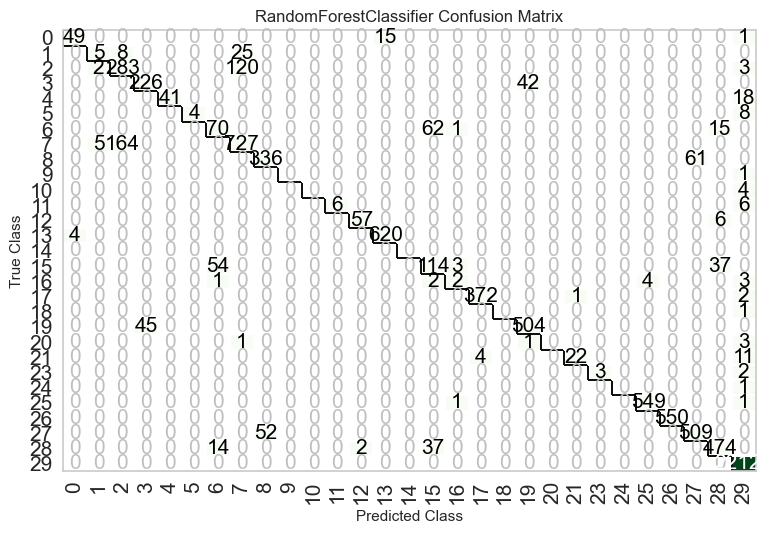

In [14]:
plot_model(rf, plot = 'confusion_matrix')

In [15]:
unseen_predictions = predict_model(rf, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9722,0,0.7057,0.9716,0.9714,0.9305,0.9305


IndexError: index 29 is out of bounds for axis 0 with size 29

In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['default'], unseen_predictions['Label'], metric = 'Accuracy')